# Hourly Bike Rental Demand Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar

In [2]:
train = pd.read_csv('train.csv',encoding="ISO-8859-1")
test = pd.read_csv('test.csv',encoding="ISO-8859-1")

In [3]:
train.head(),test.head()

(   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
 0       1        0           0        1  9.84  14.395        81        0.0   
 1       1        0           0        1  9.02  13.635        80        0.0   
 2       1        0           0        1  9.02  13.635        80        0.0   
 3       1        0           0        1  9.84  14.395        75        0.0   
 4       1        0           0        1  9.84  14.395        75        0.0   
 
    casual  registered  count  
 0       3          13     16  
 1       8          32     40  
 2       5          27     32  
 3       3          10     13  
 4       0           1      1  ,
    season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
 0       3        0           0        3  26.24  28.790        89    15.0013   
 1       3        0           0        2  26.24  28.790        89     0.0000   
 2       3        0           0        2  26.24  28.790        89     0.0000   
 3       3 

In [4]:
train.shape, test.shape

((12980, 11), (4399, 11))

In [5]:
train.columns,test.columns

(Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'),
 Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'casual', 'registered', 'count'],
       dtype='object'))

In [6]:
train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
test.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count         float64
dtype: object

# Performing Univariate Analysis

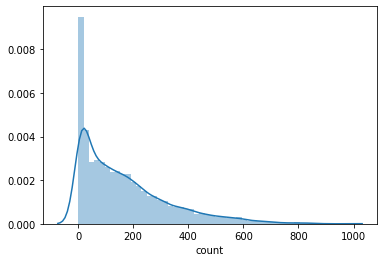

In [8]:
sn.distplot(train["count"])

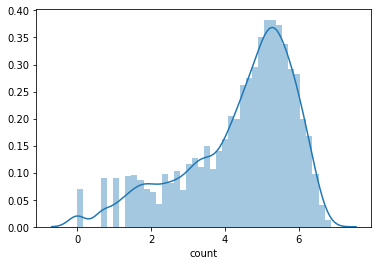

In [9]:
sn.distplot(np.log(train["count"]))

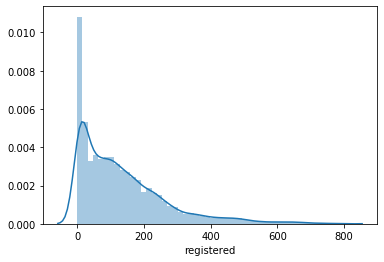

In [10]:
sn.distplot(train["registered"])

<BarContainer object of 12980 artists>

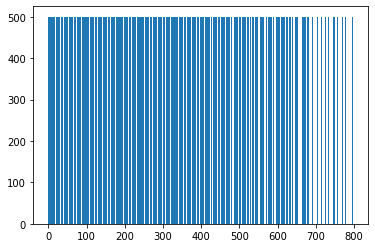

In [11]:
plt.bar(train["registered"],height=500)

# Performing Bivariate Analysis

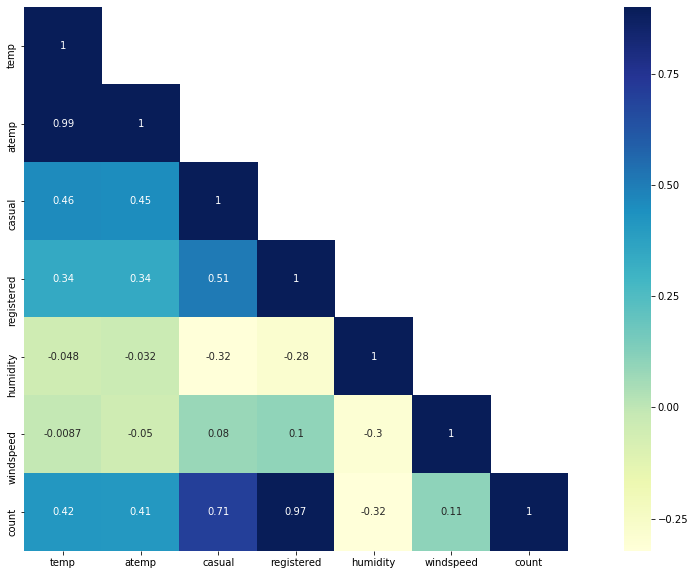

In [12]:
cor = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(cor, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [13]:
train.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [14]:
test.isnull().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual           0
registered       0
count         4399
dtype: int64

# Model Building

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
X_train = train.drop('count', 1)
y_train = np.log(train['count'])
X_test = test.drop('count', 1)
y_test = np.log(test['count'])

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12980, 10), (12980,), (4399, 10), (4399,))

In [19]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
pred = model.predict(X_test)

In [21]:
def rmsle(y, y_):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [22]:
rmsle(y_test,pred)

5.35758243968019

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
dt = DecisionTreeRegressor(max_depth=5)

In [25]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [26]:
predict = dt.predict(X_test)

In [27]:
rmsle(y_test, predict)

5.082747480871716

In [28]:
test_prediction = dt.predict(X_test)

In [29]:
final_prediction = np.exp(test_prediction)